In [105]:
pip install --user category_encoders

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import  warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\rasha\OneDrive\Desktop\Job 2026\ML PROJECTS\UCI credit card default\default of credit card clients.csv')

In [5]:
# Dataframe size
df.shape

(30000, 25)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
y = df['default payment next month']
X = df.drop('default payment next month', axis = 1)

In [8]:
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [9]:
X.drop('ID', axis = 1, inplace = True)

In [10]:
# relationship indepedent variables have with target
# check skewness of variables and target
# check outliers of variables and target

In [11]:
X.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [12]:
# there is huge range between min and max in all independent varaibles # scaling might be needed

# Analyze y variable -  Target

In [13]:
y.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [14]:
# There are much less defaulters than people who do pay ---> CLASS IMBALANCE PROBLEM

In [15]:
# At last we want RECALL of class 1 - Defaulters to be high

In [16]:
# for Columns indicating how timely the customer repaid in the past 6 months - pay_0 to pay_6
# Keeping them numeric as they are as it preserves the progressive risk --> higher = worse repayment

In [17]:
# For bill amount and actual paid amount columns, feature Engineering might help

# Payment ratio = Payment / Bill
# Utilization trend = Bill this month / Bill last month
# Average repayment delay over 6 months

In [18]:
# Analyse AGE variable

In [19]:
# How Age affects default risk

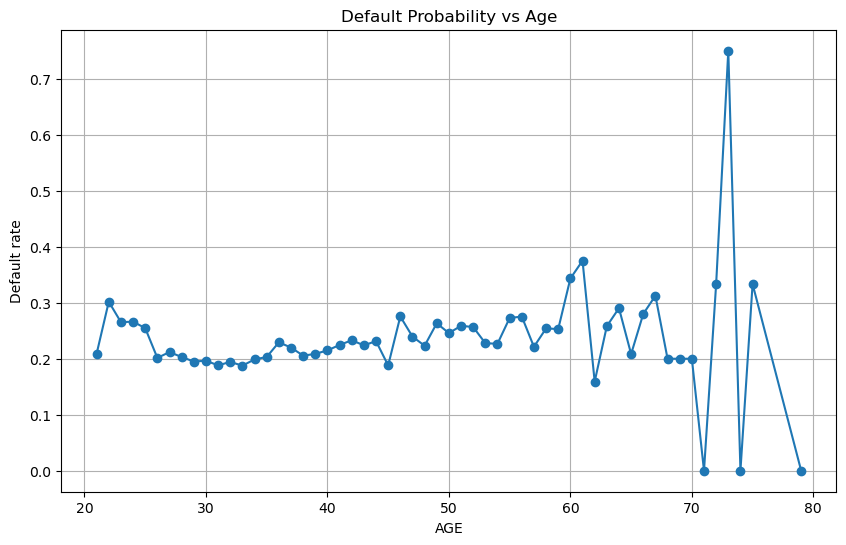

In [20]:
# Line Plot

age_default_rate = df.groupby('AGE')['default payment next month'].mean().reset_index()

plt.figure(figsize = (10,6))

plt.plot(age_default_rate['AGE'], age_default_rate['default payment next month'], marker = 'o')
plt.xlabel('AGE')
plt.ylabel('Default rate')
plt.title('Default Probability vs Age')
plt.grid(True)
plt.show()

# Interpretation

* The relationship between AGE and default is not strictly linear.It looks a bit like a U-shape:
- Higher risk when young
- Lower risk in middle age
- Risk rises again for older borrowers

* The wild fluctuations at the far right (70–80) are not reliable — likely very few customers that old in the dataset, so the rate bounces.

In [21]:
# WoE plot or informative value for AGE -- later

In [22]:
# Check if Binning makes AGE variable more useful

In [23]:
bins = [20,30,40,50,60,70,80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

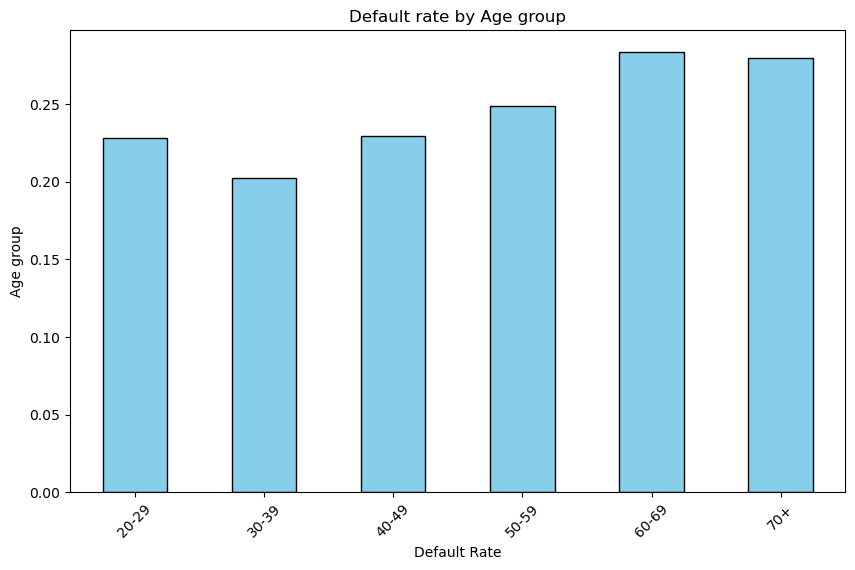

In [24]:
df['Age_bin'] = pd.cut(df['AGE'], bins = bins, labels= labels, right = False)

age_bin_default = df.groupby('Age_bin')['default payment next month'].mean()
plt.figure(figsize = (10,6))
age_bin_default.plot(kind = 'bar', color= 'skyblue', edgecolor = 'black')

plt.title('Default rate by Age group')
plt.xlabel('Default Rate')
plt.ylabel('Age group')
plt.xticks(rotation = 45)
plt.show()

In [25]:
bins = [20,30,40,50,60, 70, 80]
labels = [1,2,3,4,5,6] # ordinal encoding

X['Age_bin'] = pd.cut(X['AGE'], bins = bins, labels = labels, right = False)

In [26]:
X.drop('AGE', axis = 1, inplace = True)

In [27]:
# Gender (1 = male; 2 = female)

X['SEX'] = X['SEX'].replace(1, 0)
X['SEX'] = X['SEX'].replace(2, 1)

In [28]:
X['Age_bin'] = X['Age_bin'].astype(int)

In [29]:
# We will do TARGET ENCODING for EDUCATION and MARITAL STATUS

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import category_encoders as ce

# Logistic Regression

In [32]:
pipeline = Pipeline([('encoder', ce.TargetEncoder(cols = ['EDUCATION', 'MARRIAGE'])),
                    ('model', LogisticRegression(max_iter = 1000, class_weight="balanced"))
                    ])

In [33]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(pipeline, X_train, y_train, cv = cv, scoring = 'roc_auc')

print("Mean CV ROC-AUC of training data:", scores.mean())

Mean CV ROC-AUC of training data: 0.7247770056409509


In [34]:
from sklearn.metrics import make_scorer, recall_score

In [35]:
recall_scorer = make_scorer(recall_score, pos_label = 1)
cv_results = cross_val_score(pipeline, X_train, y_train, cv = 5, scoring = recall_scorer)
print("Mean CV Recall:", cv_results.mean())

Mean CV Recall: 0.6545507471720351


In [36]:
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

In [37]:
pipeline_xgb = Pipeline([('encoder', ce.TargetEncoder(cols = ['EDUCATION', 'MARRIAGE'])),
                    ('model', XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42))
                    ])

In [38]:
recall_scorer = make_scorer(recall_score, pos_label = 1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline_xgb, X_train, y_train, cv = cv, scoring = recall_scorer)
print("Mean CV Recall_XGB classifier:", cv_results.mean())

Mean CV Recall_XGB classifier: 0.5814658026131052


In [39]:
# XGBoost, being tree-based, tends to strongly favor the majority class unless told otherwise.
# This is why scale_pos_weight = (num_negative / num_positive) is critical for XGB.

# XGB Classifier - Hyper parameter tuning 

In [41]:
# We will try to fine tune XGB Classifier now, to capture more patterns in data

In [42]:
from random import randint, uniform

In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(2, 6),
    'learning_rate': uniform(0.01, 0.3)
    
}

xgb = XGBClassifier(max_delta_step = 1,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Use make_scorer for recall
recall = make_scorer(recall_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=make_scorer(recall_score, pos_label=1),  # so that more emphasis is given to class 1 by model
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)


In [ ]:
X_train, X_test = X_train.align(X_test, join = 'left', axis = 1, fill_value = 0)

In [ ]:
y_pred = random_search.predict(X_test)

In [ ]:
recall_score = recall_score(y_pred, y_test)

In [ ]:
print("Recall score for hyper paramter tuned XGB classifier is ",recall_score)

In [ ]:
print(classification_report(y_pred, y_test))

# Threshold tuning

In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(2, 6),
    'learning_rate': uniform(0.01, 0.3)
    
}

xgb = XGBClassifier(max_delta_step = 1,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Use make_scorer for recall
recall = make_scorer(recall_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=make_scorer(recall_score, pos_label=1),  # so that more emphasis is given to class 1 by model
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)


In [ ]:
best_model = random_search.best_estimator_

In [ ]:
# predict probabilities
y_test_proba = best_model.predict_proba(X_test)[:, 1]


threshold = 0.1

y_test_pred = (y_test_proba >= threshold).astype(int)

In [ ]:
# metrics at 0.1 threshold


print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [ ]:
# Recall has increases to satisfactory levels, but precision has gone down, that means we are
# going to get too many false postives , too many false alarms that ops tema can handle

In [ ]:
# plor precision recall curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

probs = best_model.predict_proba(X_test)[:,1]
prec, rec, thr = precision_recall_curve(y_test, probs)

plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
# Target recall rule -- recal>=0.85, tehn pick max precision

probs = best_model.predict_proba(X_test)[:,1]
prec, rec, thr = precision_recall_curve(y_test, probs)

target_recall = 0.85
candidates = np.where(rec >= target_recall)[0]

best_idx = candidates[np.argmax(prec[candidates])]
best_thr = thr[best_idx]
print(f"Threshold: {best_thr:.3f}, Precision: {prec[best_idx]:.3f}, Recall: {rec[best_idx]:.3f}")

Recall = 0.85 → you’re catching 85% of frauds.

Precision = 0.30 → only ~30% of flagged transactions are frauds (so 7/10 alerts are false alarms).

Threshold is very low, so model is being generous in flagging frauds.

In [ ]:
# Top K alerting -  generate alerts for only to k% fraud cases, most suspicious transactions

probs = best_model.predict_proba(X_test)[:, 1]
k = 0.50   # top 3%
cutoff = np.quantile(probs, 1 - k)
y_pred_topk = (probs >= cutoff).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_topk))

In [ ]:
# Fraudulent behavior is usually subtle and not well-separated in raw features.
# Good fraud models rely heavily on engineered features.

# FEATURE ENGINEERING

In [ ]:
df.head()

In [ ]:
# as seen in the dataset many customers have huge bills , and they keep on payning very small amounts each month or 
#they have not paid in last 2/3 months

Chronic under-payers → always pay a very small fraction of the bill (like 1–5%).

Payment drop-offs → pay for the first 1–2 months, then stop paying completely.

In [ ]:
X.head()

In [45]:
for i in range(1,7):
    X[f'repay_ratio{i}'] = X[f'PAY_AMT{i}'] /( X[f'BILL_AMT{i}']+ 1e-6)

In [ ]:
X.columns

In [46]:
X['chronic_underpayer'] = (X[[f'repay_ratio{i}' for i in range (1,7)]] < 0.1).all(axis= 1).astype(int)

In [47]:
# Count months with zero payment

X['zero_pay_months'] = (X[[f'PAY_AMT{i}' for i in range (1,7)]] == 0).sum(axis = 1)

In [ ]:
# Detect payment drop-off

In [48]:
def payment_dropoff(row):
    pays = [row[f"PAY_AMT{i}"] for i in range(1,7)]
    # Find last non-zero payment
    last_payment = max([i for i, amt in enumerate(pays, start=1) if amt > 0], default=0)
    # If last payment was in early months (1-2) but none later → drop-off
    return 1 if (last_payment in [1,2,3] and pays[last_payment:] == [0]*(6-last_payment)) else 0

X["payment_dropoff"] = X.apply(payment_dropoff, axis=1)


In [ ]:
X.head()

In [49]:
# flip payment drop off numbering

X["dropoff_risk"] = X["payment_dropoff"].apply(
    lambda x: 7 if x == 0 else (7 - x)
)
 # so never paid gets highest score

In [ ]:
X.head()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [52]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(2, 6),
    'learning_rate': uniform(0.01, 0.3)
    
}

xgb = XGBClassifier(max_delta_step = 1,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Use make_scorer for recall
recall = make_scorer(recall_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=make_scorer(recall_score, pos_label=1),  # so that more emphasis is given to class 1 by model
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,"XGBClassifier...state=42, ...)"
,param_distributions,"{'learning_rate': <scipy.stats....00197B6444790>, 'max_depth': <scipy.stats....00197B4FD5050>, 'n_estimators': <scipy.stats....00197B9C07550>}"
,n_iter,50
,scoring,"make_scorer(r..., pos_label=1)"
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [53]:
best_model = random_search.best_estimator_

In [57]:
# predict probabilities
y_test_proba = best_model.predict_proba(X_test)[:, 1]


threshold = 0.1
1
y_test_pred = (y_test_proba >= threshold).astype(int)

In [58]:
# metrics at 0.1 threshold


print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.41      0.57      4673
           1       0.30      0.87      0.44      1327

    accuracy                           0.52      6000
   macro avg       0.61      0.64      0.51      6000
weighted avg       0.78      0.52      0.54      6000

[[1935 2738]
 [ 166 1161]]


# Top 5% alerting -  generate alerts for only to 5% fraud cases, most suspicious transactions

In [59]:
probs = best_model.predict_proba(X_test)[:, 1]
k = 0.50   # top 5%
cutoff = np.quantile(probs, 1 - k)
y_pred_topk = (probs >= cutoff).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_topk))

              precision    recall  f1-score   support

           0       0.90      0.58      0.71      4673
           1       0.34      0.78      0.48      1327

    accuracy                           0.62      6000
   macro avg       0.62      0.68      0.59      6000
weighted avg       0.78      0.62      0.65      6000



Compared to threshold=0.1

Recall stayed high (0.87 → 0.78, slight drop).

Precision improved (0.30 → 0.34, cleaner alerts).

In [50]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,repay_ratio1,repay_ratio2,repay_ratio3,repay_ratio4,repay_ratio5,repay_ratio6,chronic_underpayer,zero_pay_months,payment_dropoff,dropoff_risk
0,20000,1,2,1,2,2,-1,-1,-2,-2,...,0.000000,0.222115,0.000000,0.000000,0.000000,0.000000,0,5,1,6
1,120000,1,2,2,-1,2,0,0,0,2,...,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309,0,2,0,7
2,90000,1,2,2,0,0,0,0,0,0,...,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564,0,0,0,7
3,50000,1,2,1,0,0,0,0,0,0,...,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844,1,0,0,7
4,50000,0,2,1,-1,0,-1,0,0,0,...,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492,0,0,0,7


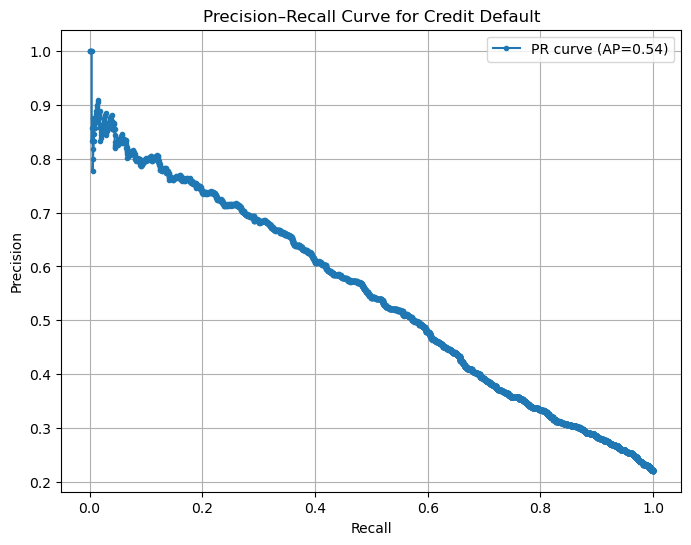

At Recall >= 0.80, max achievable Precision = 0.33


In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for class 1 (defaulters)
y_scores = random_search.predict_proba(X_test)[:, 1]   # change model -> your trained classifier

# Compute precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Average precision (area under PR curve)
ap = average_precision_score(y_test, y_scores)

# Plot
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'PR curve (AP={ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve for Credit Default')
plt.legend()
plt.grid(True)
plt.show()

# Optional: find precision at recall >= 0.80
import numpy as np
mask = recall >= 0.80
if mask.any():
    best_precision = precision[mask].max()
    print(f"At Recall >= 0.80, max achievable Precision = {best_precision:.2f}")
else:
    print("Recall never reaches 0.80 with current model.")


On the UCI Credit Default dataset, achieving Recall ≥ 80% caps Precision at ~33%, meaning most flagged cases are false positives.

This trade-off is due to dataset imbalance and overlapping behavior between defaulters and non-defaulters.

In practice, credit risk models are used as risk scores — banks pick Top-K customers to balance recall vs precision, rather than fixing both high.

In [ ]:
--------------------------------------------THE END-------------------------------------------------------------